# Basic Model Information and Architecture

In [2]:
from ultralytics import YOLO
import torch

def print_model_details(model_path):
    # Load the model
    model = YOLO(model_path)
    
    # Model summary
    print("="*50)
    print("MODEL SUMMARY")
    print("="*50)
    model.info(verbose=True)
    
    # Model parameters
    total_params = sum(p.numel() for p in model.model.parameters())
    trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
    
    print("\n" + "="*50)
    print("MODEL PARAMETERS")
    print("="*50)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    print(f"Non-trainable parameters: {total_params - trainable_params:,}")
    
    # Model architecture details
    print("\n" + "="*50)
    print("MODEL ARCHITECTURE DETAILS")
    print("="*50)
    print("Backbone layers:")
    print(model.model.model[0])  # This will vary based on YOLOv8 version
    
    print("\nNeck layers:")
    print(model.model.model[1])  # This will vary based on YOLOv8 version
    
    print("\nHead layers:")
    print(model.model.model[2])  # This will vary based on YOLOv8 version
    
    # Hyperparameters
    print("\n" + "="*50)
    print("TRAINING HYPERPARAMETERS")
    print("="*50)
    if hasattr(model, 'args'):
        for key, value in model.args.items():
            print(f"{key}: {value}")

# Usage
print_model_details(r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg\weights\best.pt")

MODEL SUMMARY
YOLOv8n-seg summary: 151 layers, 3,265,566 parameters, 0 gradients, 12.1 GFLOPs

MODEL PARAMETERS
Total parameters: 3,265,566
Trainable parameters: 0
Non-trainable parameters: 3,265,566

MODEL ARCHITECTURE DETAILS
Backbone layers:
Conv(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  (act): SiLU(inplace=True)
)

Neck layers:
Conv(
  (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  (act): SiLU(inplace=True)
)

Head layers:
C2f(
  (cv1): Conv(
    (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=F

# Model Evaluation on Test Dataset

In [27]:
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def evaluate_model(model_path, data_yaml):
    # Load the model
    model = YOLO(model_path)
    
    # Evaluate the model
    metrics = model.val(data=data_yaml, split='test')
    
    # Print basic metrics
    print("="*50)
    print("EVALUATION METRICS")
    print("="*50)
    print(f"mAP50: {metrics.box.map50}")
    print(f"mAP50-95: {metrics.box.map}")
    print(f"Mask mAP50: {metrics.seg.map50}")
    print(f"Mask mAP50-95: {metrics.seg.map}")
    
    # Get confusion matrix
    conf_matrix = metrics.confusion_matrix.matrix
    classes = metrics.names
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Additional metrics
    if hasattr(metrics, 'results_dict'):
        results_df = pd.DataFrame([metrics.results_dict])
        print("\nDetailed Metrics:")
        print(results_df.transpose())
    
    return metrics

# Usage
evaluate_model(r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg\weights\best.pt", r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\LocalDataset.yaml")

Ultralytics 8.3.80  Python-3.12.7 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv8n-seg summary (fused): 85 layers, 3,260,014 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\Final Stratified Dataset\Stratified Dataset\test\labels... 10 images, 1 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 194.51it/s]

val: New cache created: C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\Final Stratified Dataset\Stratified Dataset\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


                   all         11         47      0.919      0.788      0.821      0.714      0.977      0.743      0.813      0.689
      angular_leafspot          5          5      0.885          1      0.995      0.961      0.979          1      0.995      0.877
        Healthy Flower          1          5      0.906          1      0.995      0.851       0.99          1      0.995      0.882
          Healthy Leaf          3         20      0.925      0.622      0.704      0.557      0.971        0.5      0.704      0.534
    Healthy Strawberry          5         17      0.962      0.529      0.591      0.489      0.967      0.471       0.56      0.463
Speed: 1.0ms preprocess, 55.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\segment\val3
EVALUATION METRICS
mAP50: 0.8211849784895561
mAP50-95: 0.7144321399855933
Mask mAP50: 0.8133724784895561
Mask mAP50-95: 0.6889148916879227


<Figure size 1200x1000 with 2 Axes>


Detailed Metrics:
                             0
metrics/precision(B)  0.919462
metrics/recall(B)     0.787809
metrics/mAP50(B)      0.821185
metrics/mAP50-95(B)   0.714432
metrics/precision(M)  0.976627
metrics/recall(M)     0.742647
metrics/mAP50(M)      0.813372
metrics/mAP50-95(M)   0.688915
fitness               1.426468


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A363052150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004, 

# Plotting Training Curves

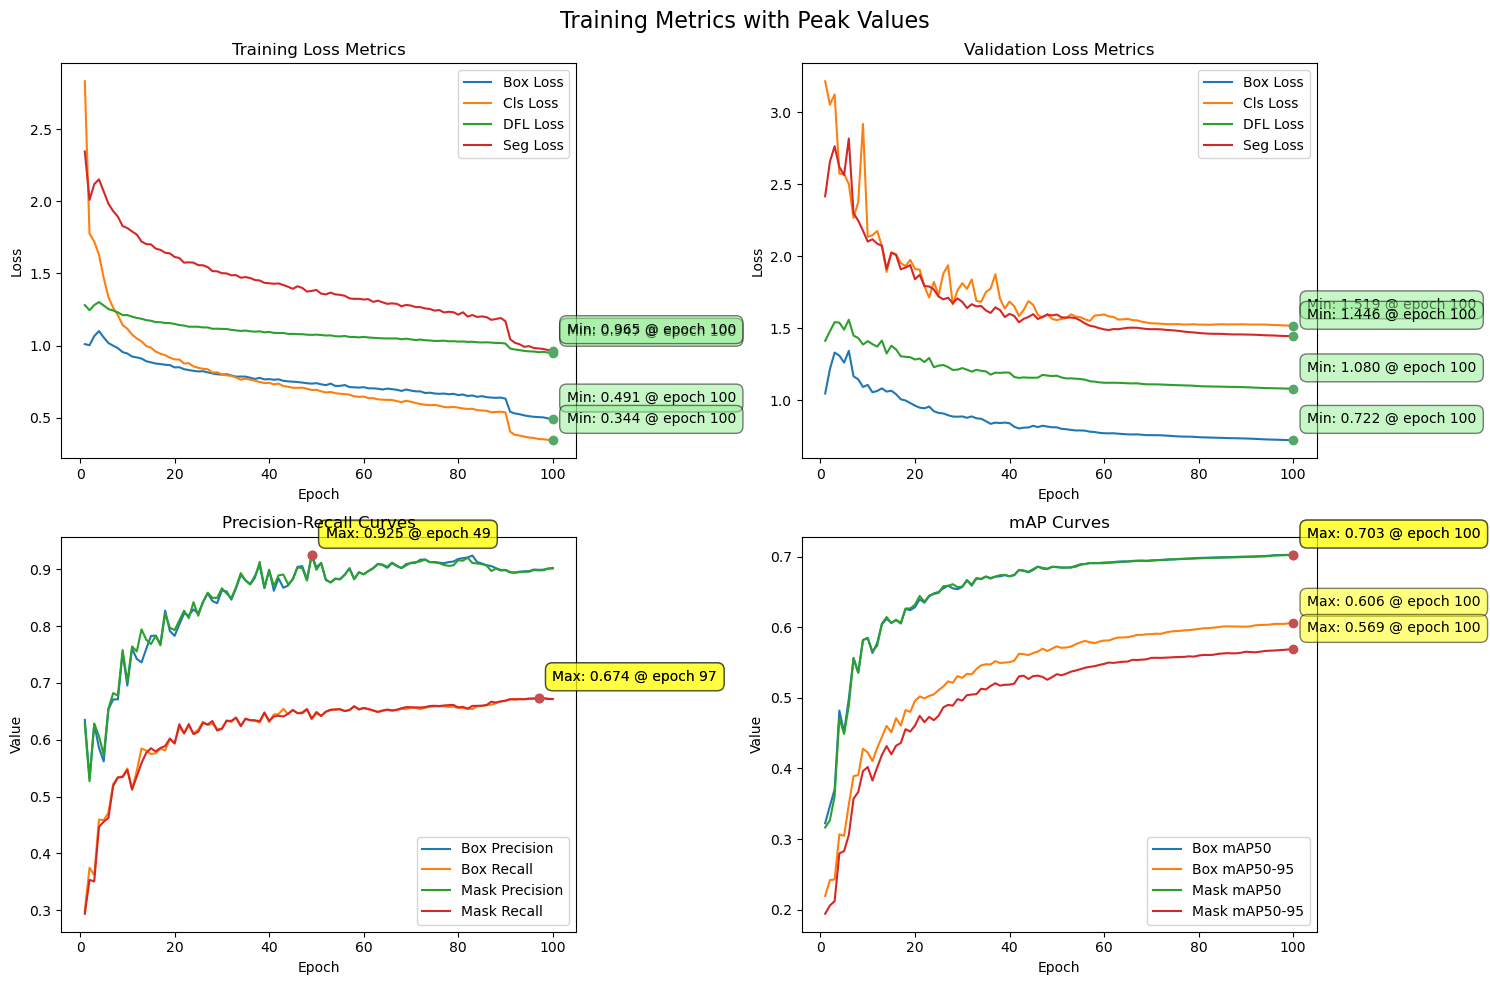


Peak Performance Summary:
--------------------------------------------------
Metric                    | Max Value  | At Epoch  
--------------------------------------------------
Box Precision             | 0.9256     | 49        
Box Recall                | 0.6743     | 97        
Mask Precision            | 0.9246     | 49        
Mask Recall               | 0.6739     | 97        
Box mAP50                 | 0.7028     | 100       
Box mAP50-95              | 0.6059     | 100       
Mask mAP50                | 0.7025     | 100       
Mask mAP50-95             | 0.5689     | 100       

Best Loss Values:
--------------------------------------------------
Metric                    | Min Value  | At Epoch  
--------------------------------------------------
Train Box Loss            | 0.4914     | 100       
Train Cls Loss            | 0.3435     | 100       
Train DFL Loss            | 0.9472     | 100       
Train Seg Loss            | 0.9654     | 100       
Val Box Loss          

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure plots appear in Jupyter
%matplotlib inline

def plot_training_curves(results_csv):
    # Load results
    results = pd.read_csv(results_csv)
    
    # Create figure with 4 subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training Metrics with Peak Values', fontsize=16)
    
    # Function to annotate max points
    def annotate_max(ax, x, y, label):
        max_idx = y.idxmax()
        max_x = x[max_idx]
        max_y = y[max_idx]
        ax.plot(max_x, max_y, 'ro')
        ax.annotate(f'Max: {max_y:.3f} @ epoch {max_x}', 
                   xy=(max_x, max_y), xytext=(10, 10),
                   textcoords='offset points', ha='left', va='bottom',
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
        return max_x, max_y
    
    # Training Loss metrics (looking for minimum loss)
    def annotate_min(ax, x, y, label):
        min_idx = y.idxmin()
        min_x = x[min_idx]
        min_y = y[min_idx]
        ax.plot(min_x, min_y, 'go')
        ax.annotate(f'Min: {min_y:.3f} @ epoch {min_x}', 
                   xy=(min_x, min_y), xytext=(10, 10),
                   textcoords='offset points', ha='left', va='bottom',
                   bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.5))
        return min_x, min_y
    
    # Plot 1: Training Loss Metrics
    ax = axs[0, 0]
    for col, label in [('train/box_loss', 'Box Loss'), 
                      ('train/cls_loss', 'Cls Loss'),
                      ('train/dfl_loss', 'DFL Loss'),
                      ('train/seg_loss', 'Seg Loss')]:
        ax.plot(results['epoch'], results[col], label=label)
        annotate_min(ax, results['epoch'], results[col], label)
    ax.set_title('Training Loss Metrics')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    
    # Plot 2: Validation Loss Metrics
    ax = axs[0, 1]
    for col, label in [('val/box_loss', 'Box Loss'), 
                      ('val/cls_loss', 'Cls Loss'),
                      ('val/dfl_loss', 'DFL Loss'),
                      ('val/seg_loss', 'Seg Loss')]:
        ax.plot(results['epoch'], results[col], label=label)
        annotate_min(ax, results['epoch'], results[col], label)
    ax.set_title('Validation Loss Metrics')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    
    # Plot 3: Precision-Recall Curves
    ax = axs[1, 0]
    for col, label in [('metrics/precision(B)', 'Box Precision'),
                      ('metrics/recall(B)', 'Box Recall'),
                      ('metrics/precision(M)', 'Mask Precision'),
                      ('metrics/recall(M)', 'Mask Recall')]:
        ax.plot(results['epoch'], results[col], label=label)
        annotate_max(ax, results['epoch'], results[col], label)
    ax.set_title('Precision-Recall Curves')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')
    ax.legend()
    
    # Plot 4: mAP Curves
    ax = axs[1, 1]
    for col, label in [('metrics/mAP50(B)', 'Box mAP50'),
                      ('metrics/mAP50-95(B)', 'Box mAP50-95'),
                      ('metrics/mAP50(M)', 'Mask mAP50'),
                      ('metrics/mAP50-95(M)', 'Mask mAP50-95')]:
        ax.plot(results['epoch'], results[col], label=label)
        annotate_max(ax, results['epoch'], results[col], label)
    ax.set_title('mAP Curves')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

    # Print max values in a table format
    print("\nPeak Performance Summary:")
    print("-"*50)
    print(f"{'Metric':<25} | {'Max Value':<10} | {'At Epoch':<10}")
    print("-"*50)
    
    # For metrics where higher is better
    high_metrics = [
        ('metrics/precision(B)', 'Box Precision'),
        ('metrics/recall(B)', 'Box Recall'),
        ('metrics/precision(M)', 'Mask Precision'),
        ('metrics/recall(M)', 'Mask Recall'),
        ('metrics/mAP50(B)', 'Box mAP50'),
        ('metrics/mAP50-95(B)', 'Box mAP50-95'),
        ('metrics/mAP50(M)', 'Mask mAP50'),
        ('metrics/mAP50-95(M)', 'Mask mAP50-95')
    ]
    
    for col, label in high_metrics:
        max_val = results[col].max()
        epoch = results['epoch'][results[col].idxmax()]
        print(f"{label:<25} | {max_val:<10.4f} | {epoch:<10}")
    
    # For metrics where lower is better (losses)
    print("\nBest Loss Values:")
    print("-"*50)
    print(f"{'Metric':<25} | {'Min Value':<10} | {'At Epoch':<10}")
    print("-"*50)
    
    low_metrics = [
        ('train/box_loss', 'Train Box Loss'),
        ('train/cls_loss', 'Train Cls Loss'),
        ('train/dfl_loss', 'Train DFL Loss'),
        ('train/seg_loss', 'Train Seg Loss'),
        ('val/box_loss', 'Val Box Loss'),
        ('val/cls_loss', 'Val Cls Loss'),
        ('val/dfl_loss', 'Val DFL Loss'),
        ('val/seg_loss', 'Val Seg Loss')
    ]
    
    for col, label in low_metrics:
        min_val = results[col].min()
        epoch = results['epoch'][results[col].idxmin()]
        print(f"{label:<25} | {min_val:<10.4f} | {epoch:<10}")

# Usage
plot_training_curves(r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg\results.csv")

## Insights and Recommendations

## Performance Analysis
### Precision-Recall Tradeoff:

High precision (0.9256 box, 0.9246 mask) but moderate recall (~0.67)

Suggests your model is conservative - when it predicts positive, it's usually correct, but misses many actual positives

The gap between precision and recall indicates potential class imbalance or overly strict confidence thresholds

### mAP Progression:

Both box and mask mAP50 reach ~0.70 at epoch 100

mAP50-95 is ~0.60 (box) and ~0.57 (mask), showing room for improvement in localization accuracy

Consistent improvement through all epochs suggests training could potentially benefit from more epochs

### Loss Dynamics:

Training losses consistently decrease (good optimization)

Validation losses plateau earlier than training losses (box at 0.72, seg at 1.45)

The cls_loss divergence (train 0.34 vs val 1.52) suggests potential overfitting on class predictions

## Key Observations
### Optimal Epoch Analysis:

Precision peaks at epoch 49, while recall/mAP peak at epoch 97-100

This suggests an interesting dynamic where the model becomes more conservative over time

Early stopping at epoch 49 might yield better precision-focused results

### Segmentation vs Detection:

Mask metrics closely track box metrics (difference < 0.5%)

Indicates your segmentation quality is directly tied to detection quality

The segmentation head isn't adding significant independent value

### Validation Challenges:

Relatively high validation losses compared to training

Particularly concerning for cls_loss (1.52 vs 0.34 training)

Suggests either:

Insufficient/different validation data

Over-optimization on training set

Need for stronger regularization

## Actionable Recommendations
### For Immediate Improvement:

Adjust Confidence Threshold: Lower slightly to improve recall without sacrificing too much precision

Class Rebalancing: If using class weights, increase weight for underrepresented classes

Test Time Augmentation: Could help boost mAP metrics by 2-3%

### Architecture Tweaks:

Add Dropout (0.1-0.3) in classification head to address overfitting

Increase Augmentation: Especially for minority classes

Review Anchor Boxes: If recall is critical, may need to adjust anchor sizes

### Training Process Improvements:

Learning Rate Schedule: Try cosine annealing with restarts

Early Stopping: Monitor mAP50-95 with patience=15 epochs

Mixed Precision: Could allow more epochs without overfitting

### Data-Level Recommendations:

Review Validation Set: Ensure it's representative

Hard Example Mining: Focus on false negatives

Label Quality Check: Particularly for segmentation masks

# Detailed Performance Metrics

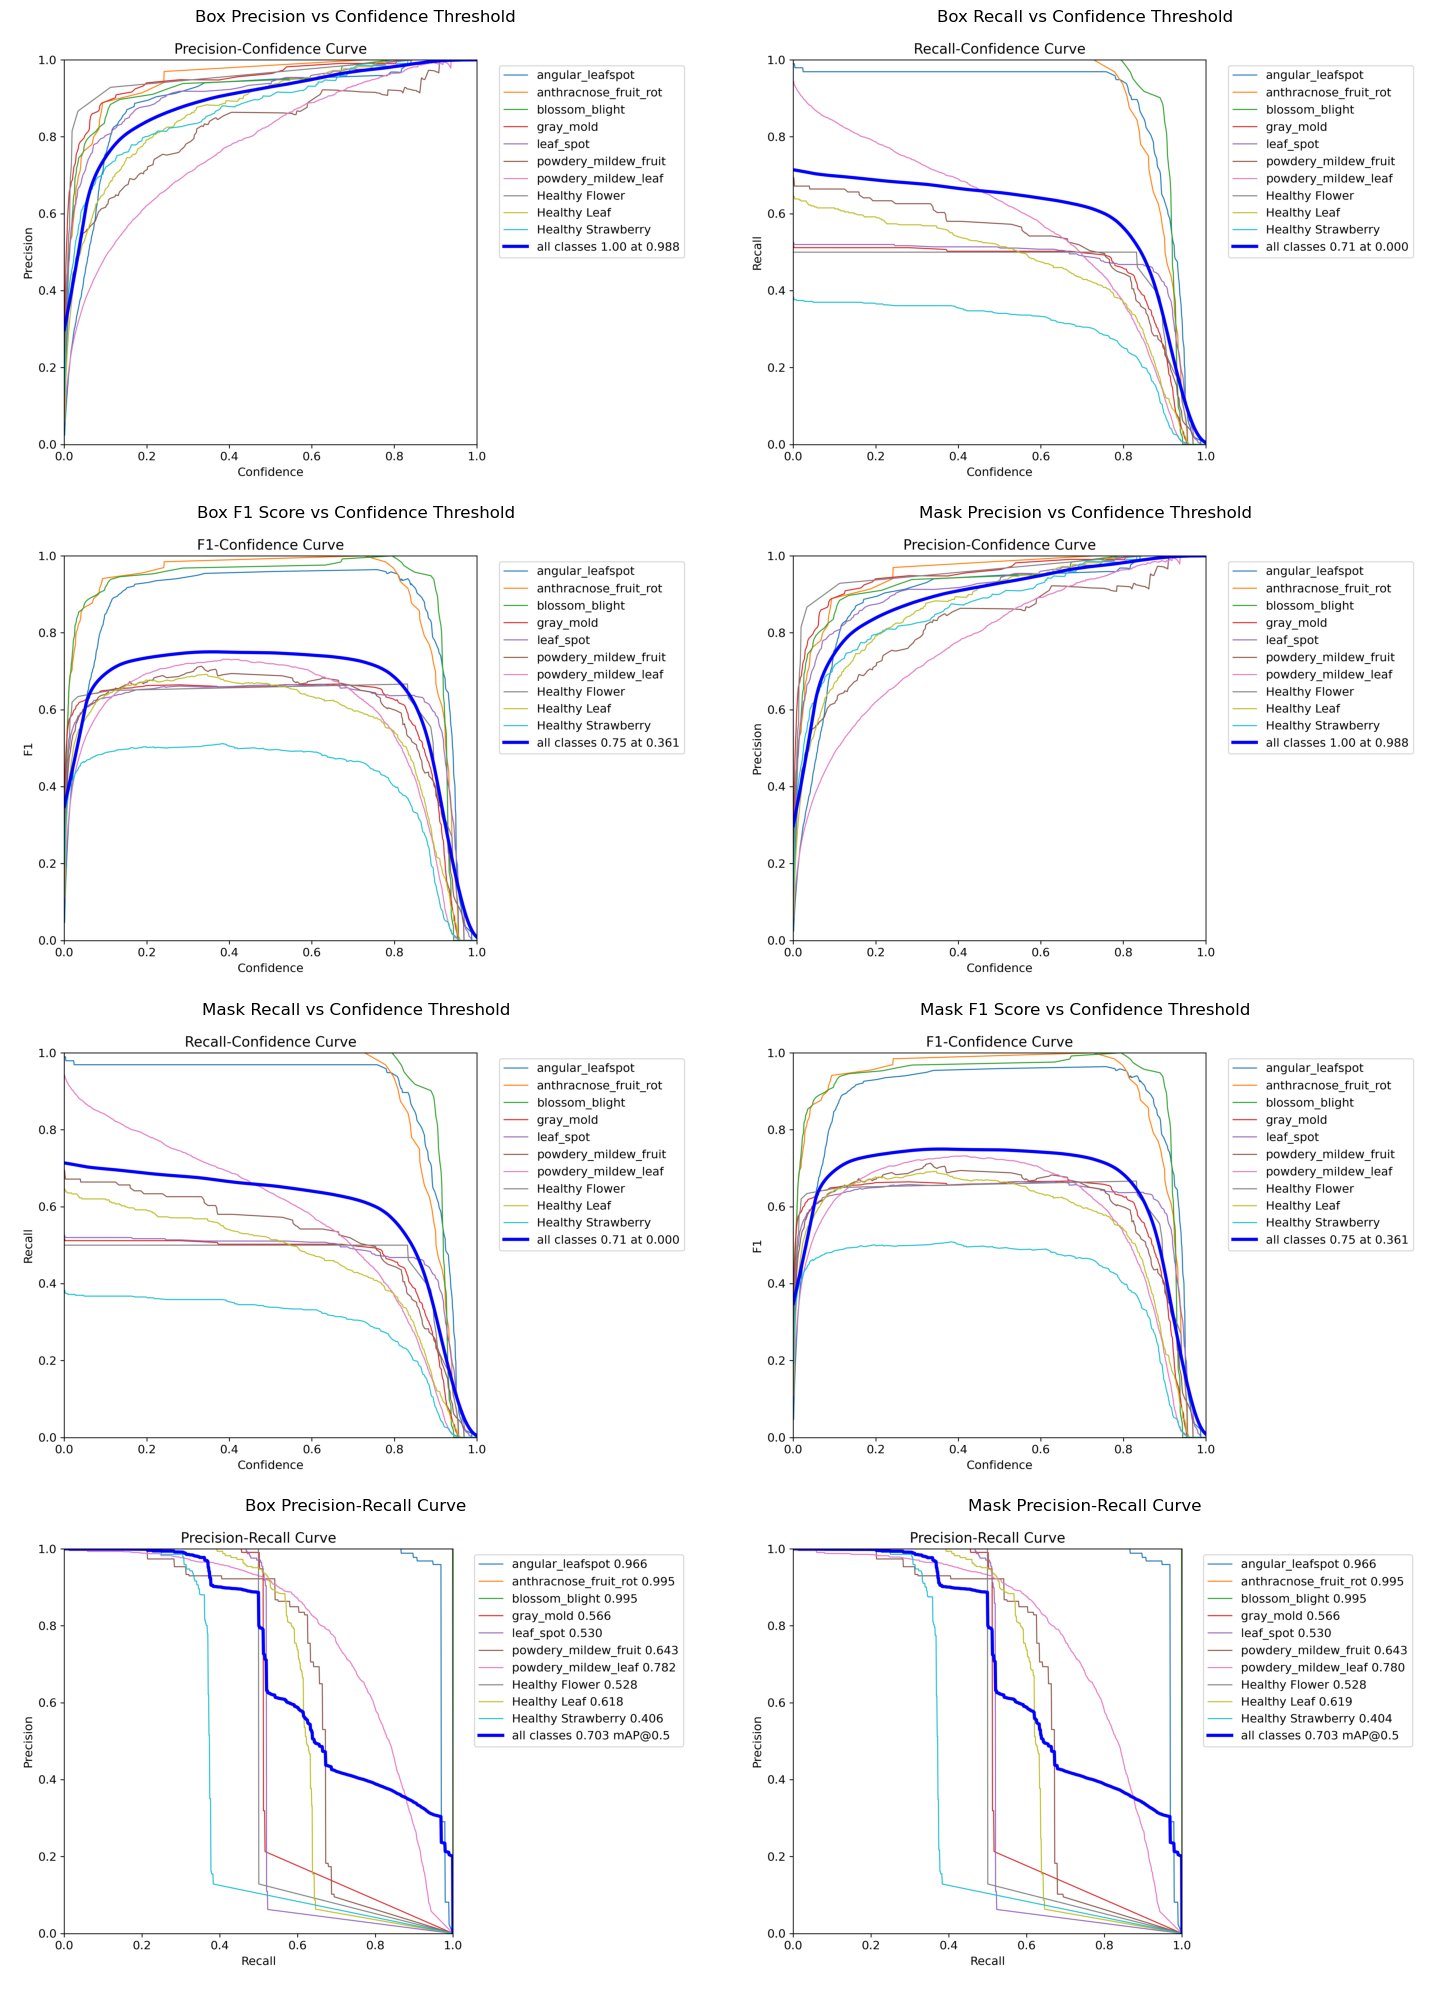

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def display_performance_metrics(model_output_dir):
    # List of required images with their titles
    images = [
        ('boxP_curve.png', 'Box Precision vs Confidence Threshold'),
        ('boxR_curve.png', 'Box Recall vs Confidence Threshold'),
        ('boxF1_curve.png', 'Box F1 Score vs Confidence Threshold'),
        ('MaskP_curve.png', 'Mask Precision vs Confidence Threshold'),
        ('MaskR_curve.png', 'Mask Recall vs Confidence Threshold'),
        ('MaskF1_Curve.png', 'Mask F1 Score vs Confidence Threshold'),
        ('BoxPR_curve.png', 'Box Precision-Recall Curve'),
        ('MaskPR_curve.png', 'Mask Precision-Recall Curve')
    ]
    
    # Create figure
    plt.figure(figsize=(15, 20))
    
    # Display each image in a subplot
    for i, (img_file, title) in enumerate(images, 1):
        img_path = os.path.join(model_output_dir, img_file)
        if not os.path.exists(img_path):
            print(f"Warning: {img_file} not found in directory")
            continue
            
        plt.subplot(4, 2, i)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage
display_performance_metrics(r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg")


# Class-wise Performance Analysis

Confusion Matrix:


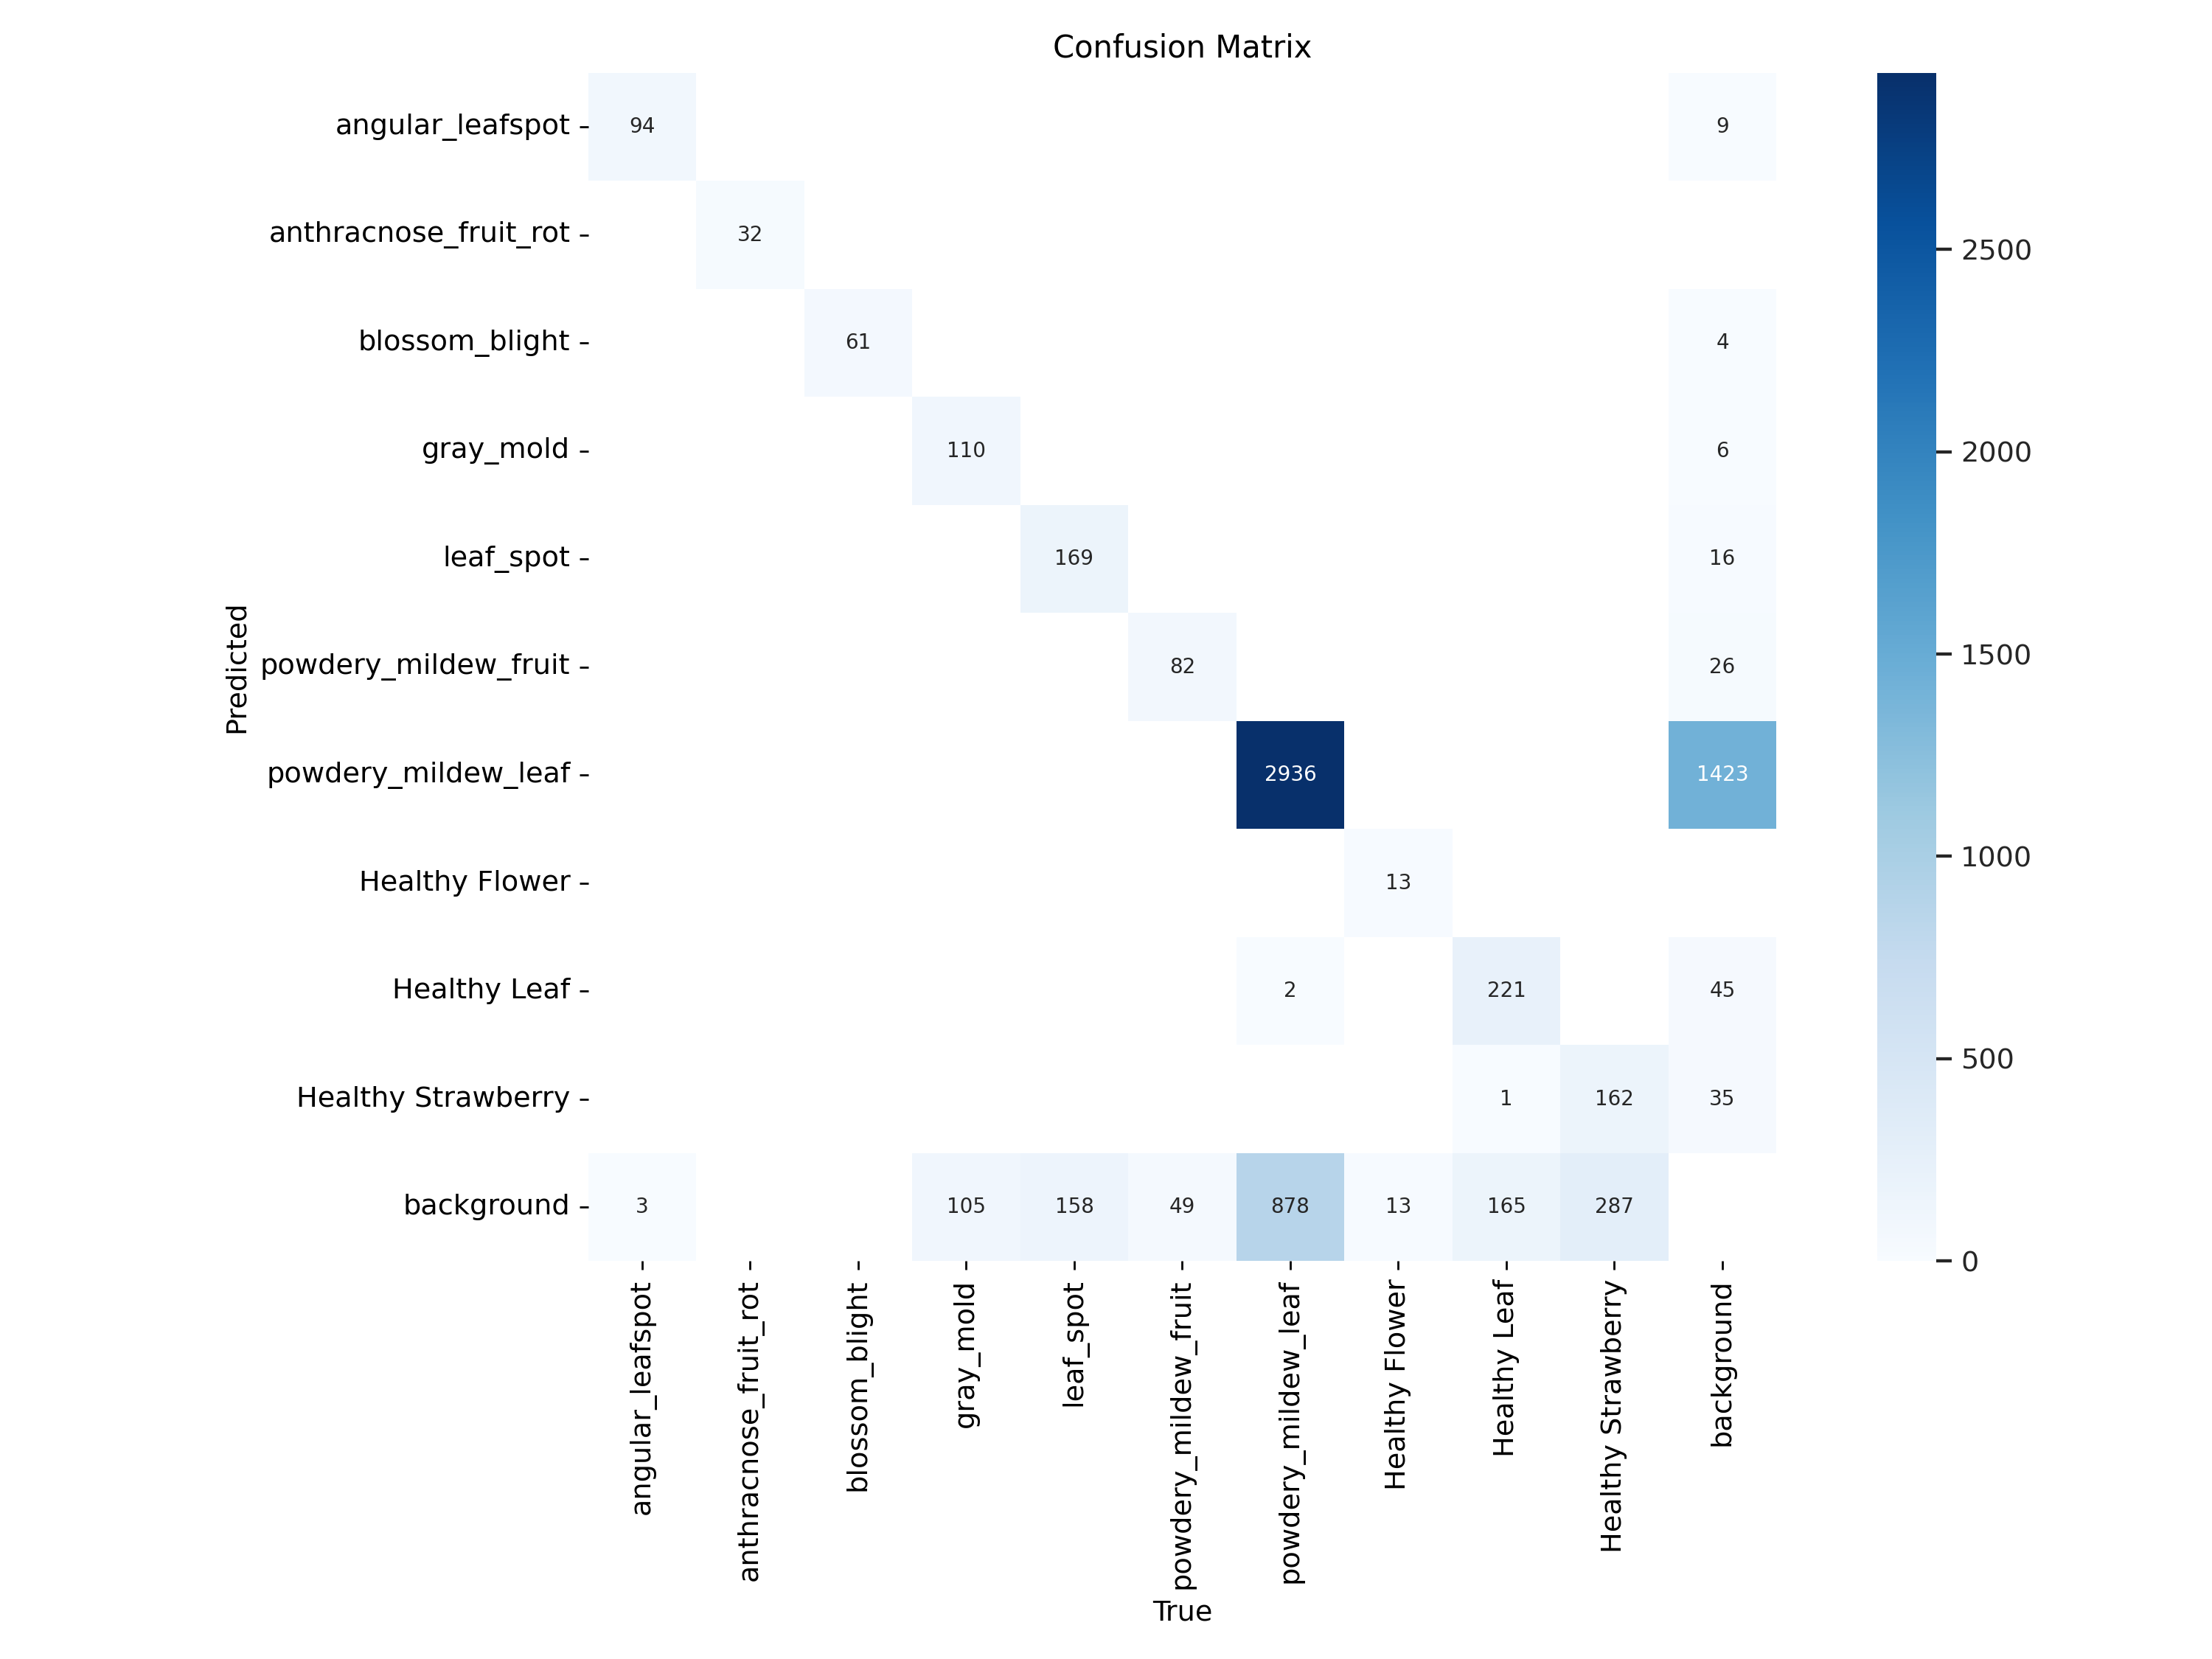


Normalized Confusion Matrix:


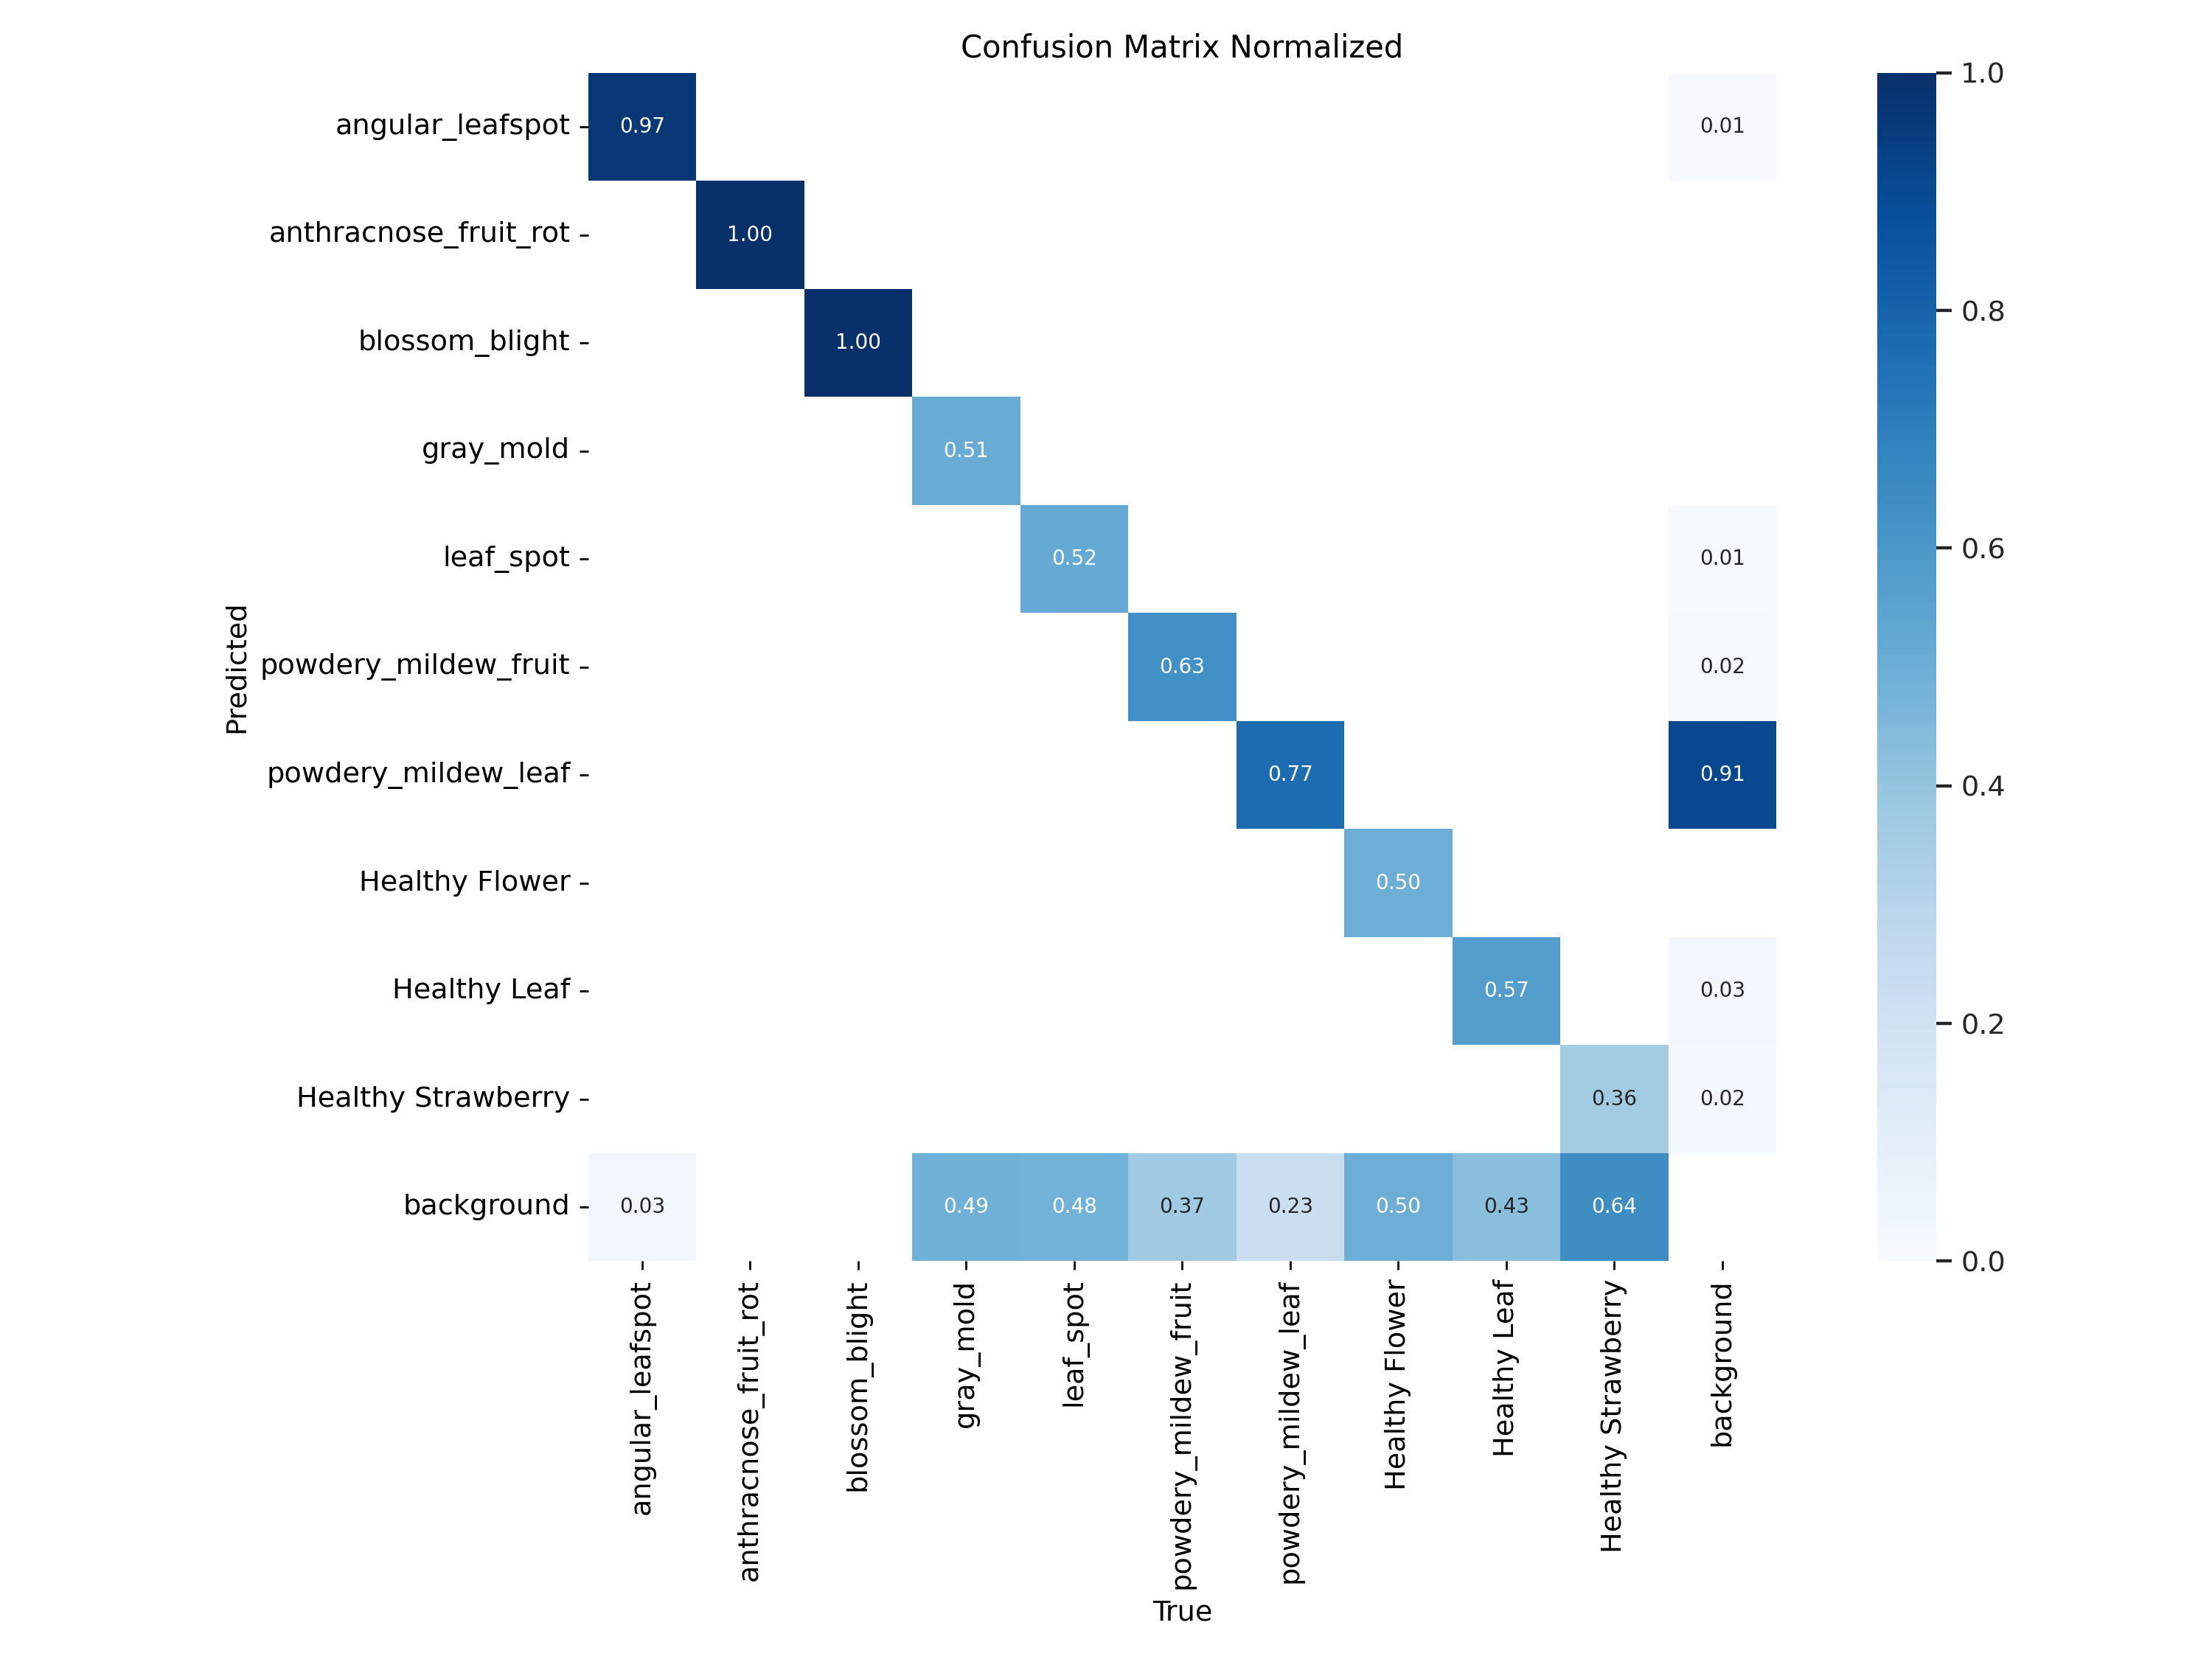

In [66]:
from IPython.display import Image, display

def show_class_analysis_images(conf_matrix_img, norm_matrix_img, class_metrics_img=None):
    """Display each image separately with titles"""
    
    print("Confusion Matrix:")
    display(Image(filename=conf_matrix_img))
    
    print("\nNormalized Confusion Matrix:")
    display(Image(filename=norm_matrix_img))
    
    if class_metrics_img and os.path.exists(class_metrics_img):
        print("\nClass-wise Metrics:")
        display(Image(filename=class_metrics_img))

# Usage
show_class_analysis_images(
    r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg\confusion_matrix.png",
    r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg\confusion_matrix_normalized.png",
)


# Making Predictions with the model

In [87]:
from ultralytics import YOLO
import cv2
import os

# Load YOLOv8 segmentation model
model = YOLO(r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\ModelOutput\kaggle\working\strawberry_seg\weights\best.pt")

# Directory setup
input_dir = r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\4) Testing Model's Output\Input Test"
output_dir = r"C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\4) Testing Model's Output\Output Test"
os.makedirs(output_dir, exist_ok=True)

# Process each image
for img_name in os.listdir(input_dir)[:5]:  # Only process first 5 images
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_dir, img_name)
        
        # Create a subfolder for this image
        img_folder_name = os.path.splitext(img_name)[0]  # Remove extension
        img_output_dir = os.path.join(output_dir, img_folder_name)
        os.makedirs(img_output_dir, exist_ok=True)
        
        # Run inference
        results = model.predict(img_path, save=False)
        
        # Extract masks, boxes, and labels
        for result in results:
            # Save annotated image
            annotated_img = result.plot()
            output_img_path = os.path.join(img_output_dir, f"annotated_{img_name}")
            cv2.imwrite(output_img_path, annotated_img[:, :, ::-1])
            
            # Save masks
            if result.masks is not None:
                masks = result.masks.data.cpu().numpy()
                for i, mask in enumerate(masks):
                    mask_path = os.path.join(img_output_dir, f"mask_{i}.png")
                    cv2.imwrite(mask_path, (mask * 255).astype('uint8'))
            
            # Save labels
            if result.boxes is not None:
                labels = result.boxes.data.cpu().numpy()
                with open(os.path.join(img_output_dir, "labels.txt"), 'w') as f:
                    for *xyxy, conf, cls in labels:
                        f.write(f"{int(cls)} {conf:.2f} {' '.join(map(str, xyxy))}\n")

print(f"Results saved to individual folders in: {output_dir}")


image 1/1 C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\4) Testing Model's Output\Input Test\Anthracnose-on-strawberry.jpeg.jpeg: 256x448 1 anthracnose_fruit_rot, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 448)

image 1/1 C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\4) Testing Model's Output\Input Test\flowers-fruits-garden-strawberry-plant-species.jpeg: 288x448 5 Healthy Flowers, 1 Healthy Leaf, 4 Healthy Strawberrys, 29.6ms
Speed: 0.8ms preprocess, 29.6ms inference, 3.4ms postprocess per image at shape (1, 3, 288, 448)

image 1/1 C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\4) Testing Model's Output\Input Test\Leaf-Spot-strawberry.jpeg.jpeg: 256x448 1 leaf_spot, 33.3ms
Speed: 1.3ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 448)

image 1/1 C:\Users\Ibrahim_Hegazi\Desktop\Graduation_Project\4) Testing Model's Output\Input Test\Powdery-Mildew.jpeg.jpeg: 256x448 1 powdery_mildew